### Profit curves and imbalanced classes - supplementary code

In [1]:
# imports
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
%matplotlib inline

There are 105 positive cases
The percentage of positive cases is 10.5%


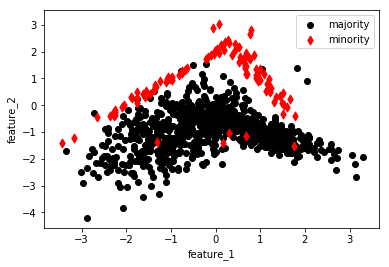

In [15]:
# make dummy data 2 informative features, 2 clusters, some overlap, minority class 10%
num_samp = 1000
X, y = make_classification(n_samples = num_samp, n_features=2, n_redundant=0,
                           n_informative=2, n_classes=2, weights=[0.9, 0.1], 
                           n_clusters_per_class=2, class_sep=1.0,
                           random_state = 3
                          )
X0, X1 = X[y==0], X[y==1] # majority, minority class
print("There are {0} positive cases".format(len(X1)))
print("The percentage of positive cases is {0}%".format(len(X1)/num_samp * 100))
plt.scatter(X0[:, 0], X0[:, 1], marker='o', c='k', label = 'majority')
plt.scatter(X1[:, 0], X1[:, 1], marker='d', c='r', label = 'minority', s = 40)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.legend();

y_test has 200 values.


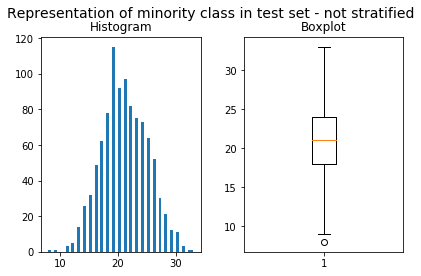

In [16]:
# perform an 80:20 train-test-split 1000 times and look at the number
# of minority class that ends up in test set
num_tt_splits = 1000
num_minority = np.zeros(num_tt_splits)
for i in range(num_tt_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                       test_size=0.20, random_state=None)
    num_minority[i] = np.sum(y_test)

print("y_test has {0} values.".format(len(y_test)))
# now plot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(num_minority, bins = 50)
ax1.set_title('Histogram')
ax2.boxplot(num_minority)
ax2.set_title('Boxplot')
fig.suptitle('Representation of minority class in test set - not stratified', 
             fontsize = 14)
fig.tight_layout(pad = 2);
# try re-running with random_state set

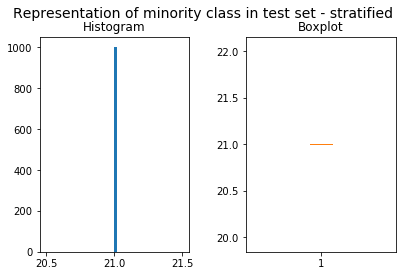

In [17]:
#now stratify when doing train_test_split
num_minority = np.zeros(num_tt_splits)
for i in range(num_tt_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                       test_size=0.20, random_state=None)
    num_minority[i] = np.sum(y_test)

# now plot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(num_minority, bins = 50)
ax1.set_title('Histogram')
ax2.boxplot(num_minority)
ax2.set_title('Boxplot')
fig.suptitle('Representation of minority class in test set - stratified', 
             fontsize = 14)
fig.tight_layout(pad = 2);

### We've established that `stratify` maintains the proportion of the minority class in the test set.  Now let's look at the effect of `stratify` and `class_weight` on the performance of our model.

In [19]:
num_iter = 200
accuracy_list = [] # accuracy, no class weights, no stratification
precision_list = [] # precision, no class weights, no stratification
recall_list = [] # recall, no class weights, no stratification

accuracy_class_weights_stratified_list = [] # accuracy, with class weights, with stratification
precision_class_weights_stratified_list = [] # precision, with class weights, with stratification
recall_class_weights_stratified_list = [] # recall, with class weights, with stratification

for _ in range(num_iter):
    # base model - no class weights
    rf_noclass_weights = RandomForestClassifier(class_weight=None)

    # model that takes into account class weight
    rf_class_weights = RandomForestClassifier(class_weight='balanced')

    # non-stratifyified train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    # stratifyified train-test-split
    X_train_stratify, X_test_stratify, y_train_stratify, y_test_stratify = train_test_split(
        X, y, stratify=y, test_size=0.20
    )
    
    # fit model - no stratifyification or class weight
    rf_noclass_weights.fit(X_train, y_train)
    y_pred_noclass_weights = rf_noclass_weights.predict(X_test)
    accuracy_noclass_weights = accuracy_score(y_test, y_pred_noclass_weights)
    rcl_noclass_weights = recall_score(y_test, y_pred_noclass_weights)
    prc_noclass_weights = precision_score(y_test, y_pred_noclass_weights)

    # fit model - stratifyification and class weight
    rf_class_weights.fit(X_train_stratify, y_train_stratify)
    y_pred_class_weights_stratify = rf_class_weights.predict(X_test_stratify)
    accuracy_class_weights_stratify = accuracy_score(y_test_stratify, y_pred_class_weights_stratify)
    rcl_class_weights_stratify = recall_score(y_test_stratify, y_pred_class_weights_stratify)
    prc_class_weights_stratify = precision_score(y_test_stratify, y_pred_class_weights_stratify)

#    print("  No stratify, no class_weights - accuracy: {0:6.3f}, recall: {1:6.3f}, precision: {2:6.3f}".format(
#           accuracy_noclass_weights, rcl_noclass_weights, prc_noclass_weights))
#    print("With stratify and class_weights - accuracy: {0:6.3f}, recall: {1:6.3f}, precision: {2:6.3f}".format(
#           accuracy_class_weights_stratify, rcl_class_weights_stratify, prc_class_weights_stratify))
    
    accuracy_list.append(accuracy_noclass_weights)
    precision_list.append(prc_noclass_weights)
    recall_list.append(rcl_noclass_weights)
    
    accuracy_class_weights_stratified_list.append(accuracy_class_weights_stratify)
    precision_class_weights_stratified_list.append(prc_class_weights_stratify)
    recall_class_weights_stratified_list.append(rcl_class_weights_stratify)

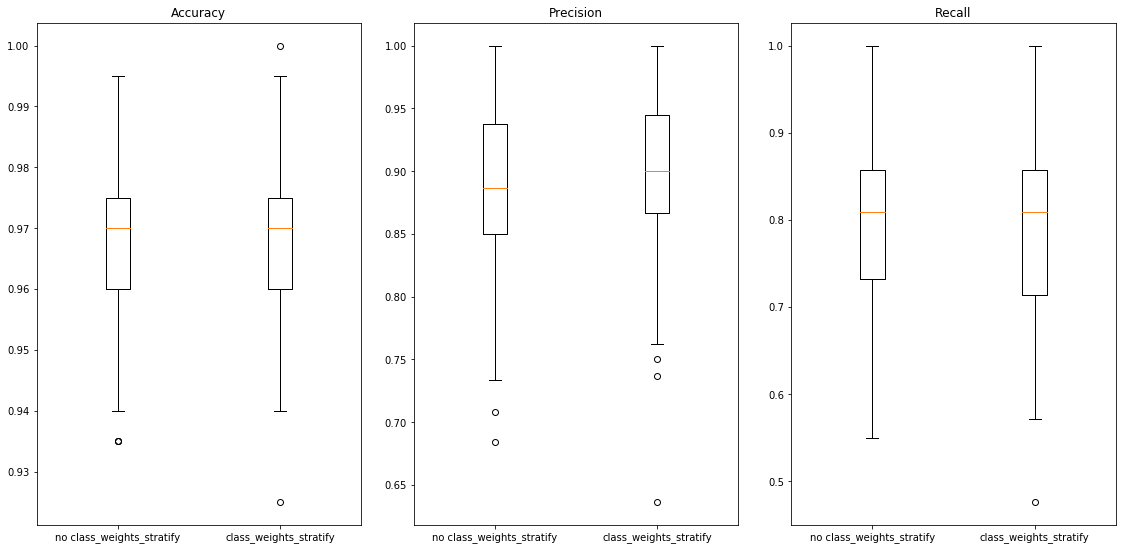

In [20]:
# now plot
labls = ['no class_weights_stratify','class_weights_stratify']
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,3,1)
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.boxplot([accuracy_list,accuracy_class_weights_stratified_list])
ax1.set_xticklabels(labls)
ax1.set_title('Accuracy')

ax2 = fig.add_subplot(1,3,2)
ax2.boxplot([precision_list, precision_class_weights_stratified_list])
ax2.set_xticklabels(labls)
ax2.set_title('Precision')

ax3 = fig.add_subplot(1,3,3)
ax3.boxplot([recall_list, recall_class_weights_stratified_list])
ax3.set_xticklabels(labls)
ax3.set_title('Recall')
fig.tight_layout(pad = 2);